In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
from tqdm import tqdm

nv = np.arange(1,101)
u_cm = 0
u_cm1 = 0
u_fft = 0
u_fft1 = 0
width = 0
u_sigma = 0
u_sigma1 = 0
it_max = 1024 + 1

for n in tqdm(nv):
    data = np.load('data/1906_da_' + str(n) + '.npz')
    u_fft += data['u_fft'][:it_max]
    u_fft1 += data['u_fft1'][:it_max]
    width += data['width'][:it_max]
    u_sigma += data['u_sigma'][:it_max]
    u_sigma1 += data['u_sigma1'][:it_max]
    u_cm += data['u_cm'][:it_max]
    u_cm1 += data['u_cm1'][:it_max]
    t = data['t'][:it_max]

u_fft = u_fft/len(nv)
u_fft1 = u_fft1/len(nv)
width = width/len(nv)
u_sigma = u_sigma/len(nv)
u_sigma1 = u_sigma1/len(nv)
u_cm = u_cm/len(nv)
u_cm1 = u_cm1/len(nv)

100%|██████████| 100/100 [00:03<00:00, 26.12it/s]


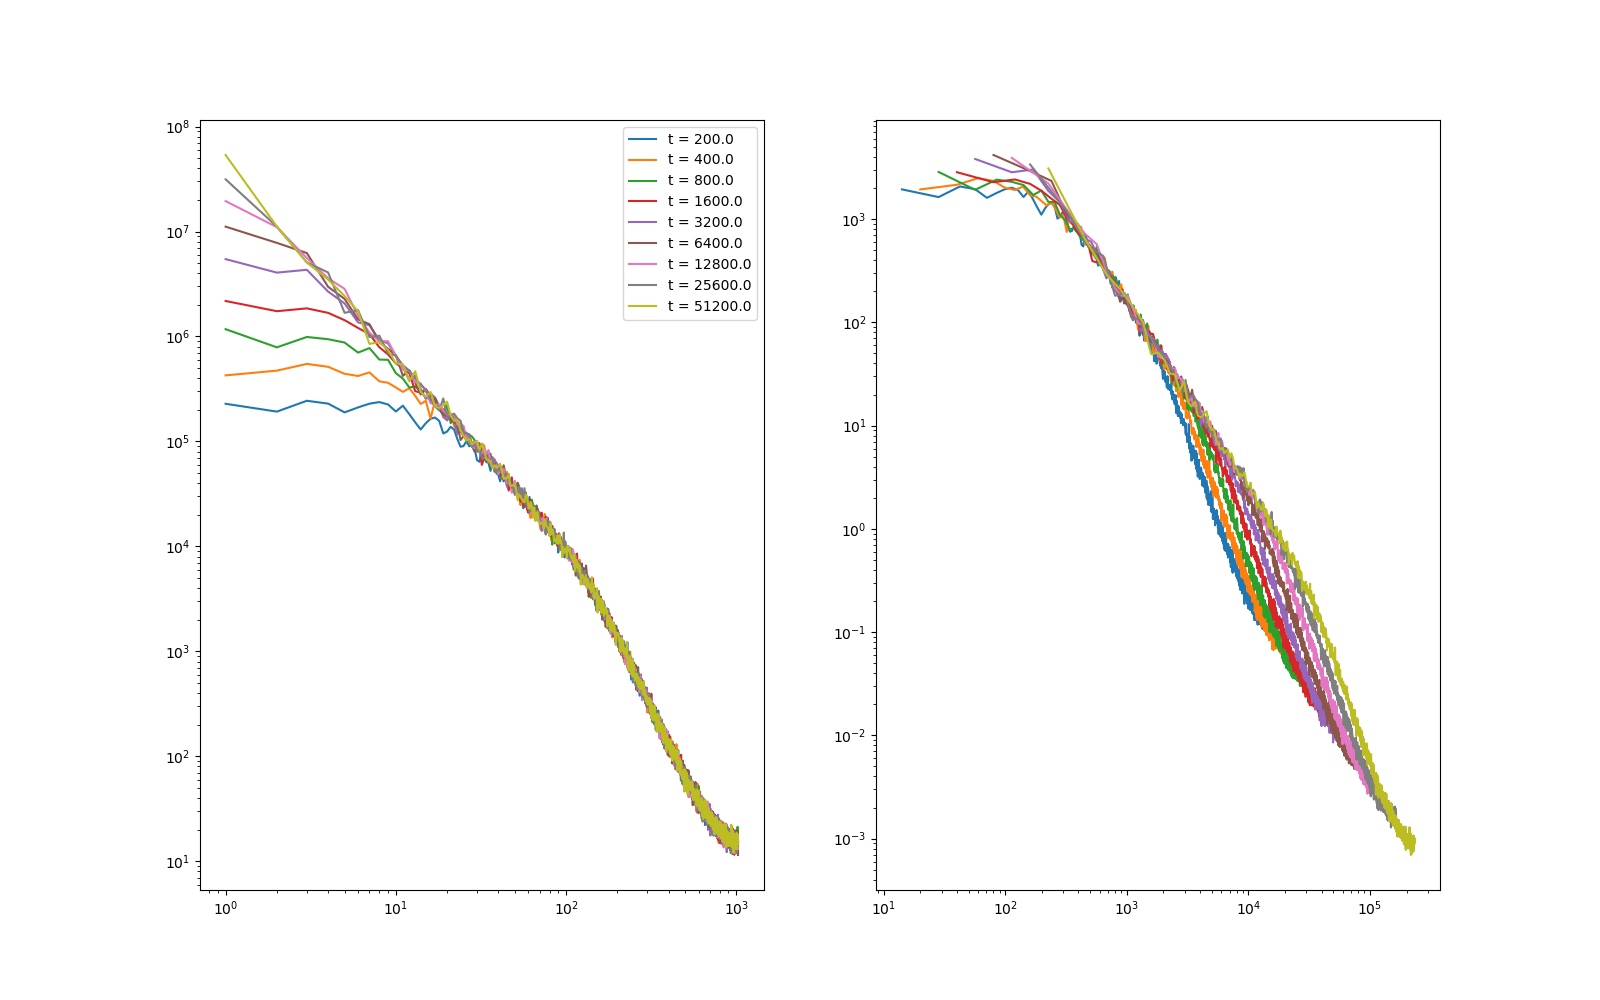

In [3]:
Ly = 2048

nv = np.arange(1,Ly//2+1)
iv = np.array([int(2**i) for i in range(2,11)])
zeta = .4
z = 2

fig,ax = plt.subplots(1,2,figsize=(16,10))
for i in iv:
    ax[0].loglog(nv,u_fft1[i][1:],label = 't = {}'.format(t[i]))
    ax[1].loglog(nv*t[i]**(1/z),u_fft1[i][1:]/t[i]**((1+2*zeta)/z),label = 't = {}'.format(t[i]))

#ax[0].loglog(nv,1e8*nv**-(1+2*zeta),'--',label = '$\zeta = {}$'.format(zeta),c='k')


#plt.xlim(1,500)
#plt.ylim(1e4,1e8)
ax[0].legend()
plt.show()

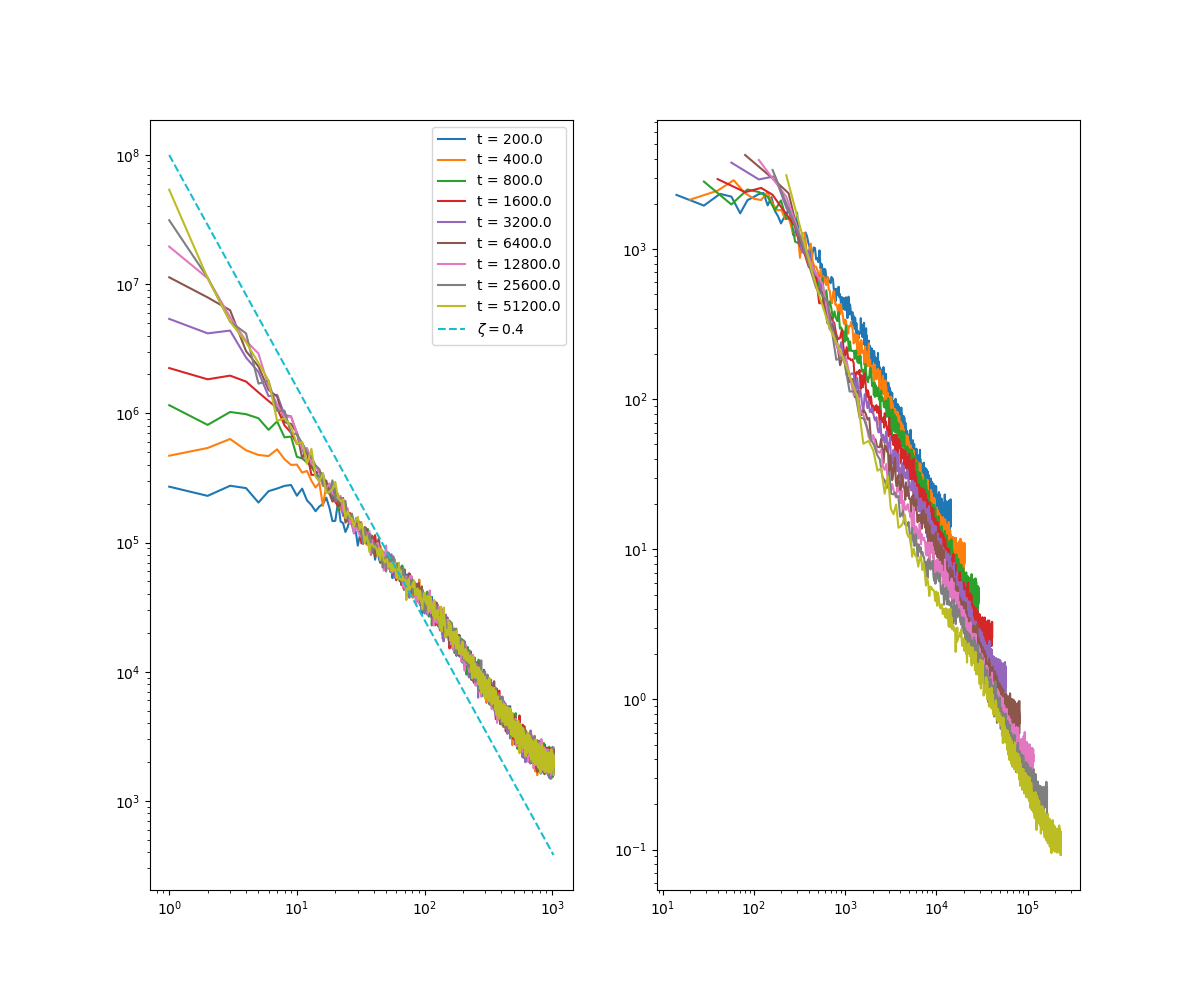

In [4]:
Ly = 2048

nv = np.arange(1,Ly//2+1)
iv = np.array([int(2**i) for i in range(2,11)])
zeta = .4
z = 2

fig,ax = plt.subplots(1,2,figsize=(12,10))
for i in iv:
    ax[0].loglog(nv,u_fft[i][1:],label = 't = {}'.format(t[i]))
    ax[1].loglog(nv*t[i]**(1/z),u_fft[i][1:]/t[i]**((1+2*zeta)/z),label = 't = {}'.format(t[i]))

ax[0].loglog(nv,1e8*nv**-(1+2*zeta),'--',label = '$\zeta = {}$'.format(zeta))


#plt.xlim(1,500)
#plt.ylim(1e4,1e8)
ax[0].legend()
plt.show()

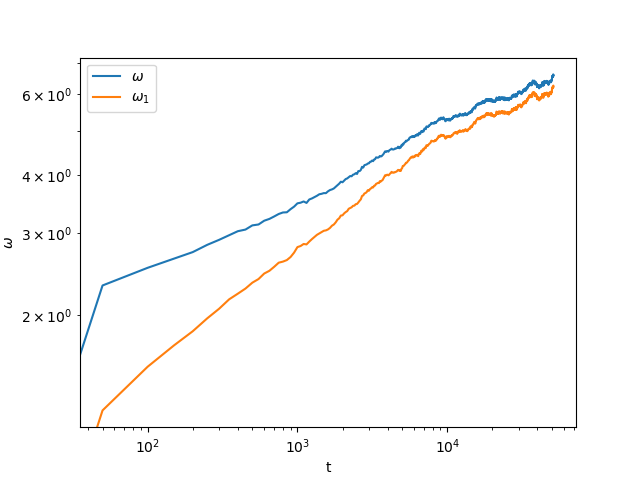

In [5]:
plt.figure()
plt.loglog(t,u_sigma,label = r'$\omega$')
plt.loglog(t,u_sigma1,label = r'$\omega_1$')
plt.xlabel('t')
plt.ylabel(r'$\omega$')
plt.legend()
plt.show()